In [189]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/yelp-dataset-based-on-fake-reviewers/cleaned_data.csv
/kaggle/input/deceptive-opinion-spam-corpus/deceptive-opinion.csv


In [190]:
import re
import string
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [191]:
df = pd.read_csv('/kaggle/input/deceptive-opinion-spam-corpus/deceptive-opinion.csv')

In [192]:
df.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [193]:
df = df.drop(["hotel", "polarity","source"], axis=1)

In [194]:
df = df.sample(frac=1)

In [195]:
df.head()

,deceptive,text
1514,deceptive,Hotel is located 1/2 mile from the train stati...
1426,deceptive,My husband and I stayed here at the Hard Rock ...
575,deceptive,I was in town to visit my cousin an stayed for...
643,deceptive,The stay at the Hilton Chicago definetely felt...
804,truthful,They allowed parties to go on all night and bo...


In [196]:
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['deceptive']= label_encoder.fit_transform(df['deceptive']) 

df['deceptive'].unique() 

array([0, 1])

In [197]:
df.head()

,deceptive,text
1514,0,Hotel is located 1/2 mile from the train stati...
1426,0,My husband and I stayed here at the Hard Rock ...
575,0,I was in town to visit my cousin an stayed for...
643,0,The stay at the Hilton Chicago definetely felt...
804,1,They allowed parties to go on all night and bo...


In [198]:
#dataset description #truthful=1 deceptive=0
df.groupby('deceptive').describe()

text                                                               
          count unique                                                top freq
deceptive                                                                     
0           800    800  I stayed at the Swissotel Chicago while I was ...    1
1           800    796  Very disappointed in our stay in Chicago Monoc...    2

In [199]:
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

In [200]:
# Some preprocesssing that will be common to all the text classification methods

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_char(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [201]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [202]:
df['text'] = df['text'].map(lambda a: clean_numbers(a))

In [203]:
df['text'] = df['text'].map(lambda a: clean_char(a))

In [204]:
df['text'] = df['text'].map(lambda a: clean_text(a))

In [205]:
df['text']

1514    hotel locat mile train station quit hike trave...
1426    husband stay hard rock hotel chicago month bac...
575     town visit cousin stay three night wonder hote...
643     stay hilton chicago definet felt like vacat sl...
804     allow parti night book room run water call sec...
90      back busi trip homewood great locat magnific m...
992     chicago skinni hope run wash rock star cece de...
684     heard friend talk hotel monaco chicago doubt f...
162     attend confer mariott book share room hard roc...
988     husband stay overnight affinia prior review le...
1329    chicago favorit citi visit want share special ...
1522    amalfi hotel advertis luxuri boutiqu hotel exp...
1213    recent stay hyatt regenc chicago hotel downtow...
174     girlfriend stay night talbott return home satu...
1016    worth price almost stay hotel night instead ch...
1577    first step foot hotel propeti could tell negat...
247     stun hotel excel locat greatest citi entranc l...
1424    stay h

In [206]:
df.describe()

,deceptive
count,1600.000000
mean,0.500000
std,0.500156
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1514 to 983
Data columns (total 2 columns):
deceptive    1600 non-null int64
text         1600 non-null object
dtypes: int64(1), object(1)
memory usage: 37.5+ KB


In [208]:
x = df['text']
y = df['deceptive']

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [210]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['deceptive'], random_state=5)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 1600
Number of rows in the training set: 1200
Number of rows in the test set: 400


In [211]:
X_train, X_test, y_train, y_test

(82      got back three night knickerbock went chicago ...
 1102    look fun contemporari hotel deliv lobbi nice r...
 1509    stay hilton chicago quit unpleas might ask wel...
 820     bell boy need sulli staff smile place wait min...
 696     stay hilton chicago pleasur arriv departur sta...
 1131    stay palmer hous one night earli januari year ...
 1552    hotel good name good locat chicago unfortun un...
 303     stay jame perfect room thought design light st...
 302     beauti appoint profession staf comfort well lo...
 1158    stay hotel day novemb togeth colleagu internet...
 133     perfect locat clean courteous staff ad great s...
 666     wife stay last weekend honeymoon wonder hotel ...
 1095    husband confer book room thru websit call conf...
 58      friend stay one night love hotel awesom water ...
 1004    schedul stay hard rock june cancel book hotel ...
 1453    realli wish could say like hotel whole experi ...
 509     everyth would would expect top notch hotel exc.

In [212]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [213]:
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [214]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [215]:
predictions = naive_bayes.predict(testing_data)

In [216]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
mnbaccuracy = accuracy_score(y_test, predictions)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.875
Precision score:  0.8888888888888888
Recall score:  0.8527918781725888
F1 score:  0.8704663212435234


In [217]:
from sklearn.svm import SVC 
svc = SVC()
svc.fit(training_data, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [218]:
svc_predictions = svc.predict(testing_data)

In [219]:
from sklearn.metrics import accuracy_score
svcaccuracy = accuracy_score(y_test,svc_predictions)
print('Accuracy score: ', format(accuracy_score(y_test,svc_predictions)))
print('Precision score: ', format(precision_score(y_test,svc_predictions)))
print('Recall score: ', format(recall_score(y_test, svc_predictions)))
print('F1 score: ', format(f1_score(y_test, svc_predictions)))

Accuracy score:  0.6375
Precision score:  0.58125
Recall score:  0.9441624365482234
F1 score:  0.7195357833655706


In [252]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(training_data, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [800, 1200]

In [221]:
knn_predictions = knn.predict(testing_data)

In [222]:
from sklearn.metrics import accuracy_score
knnaccuracy = accuracy_score(knn_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(knn_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,knn_predictions)))
print('Recall score: ', format(recall_score(y_test, knn_predictions)))
print('F1 score: ', format(f1_score(y_test, knn_predictions)))

Accuracy score:  0.5775
Precision score:  0.7916666666666666
Recall score:  0.19289340101522842
F1 score:  0.310204081632653


In [223]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
training_data1 = training_data.toarray()
gnb.fit(training_data1, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [224]:
testing_data1= testing_data.toarray()
gnb_predictions = gnb.predict(testing_data1)

In [225]:
from sklearn.metrics import accuracy_score
gnb_accuracy = accuracy_score(gnb_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(gnb_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,gnb_predictions)))
print('Recall score: ', format(recall_score(y_test, gnb_predictions)))
print('F1 score: ', format(f1_score(y_test, gnb_predictions)))

Accuracy score:  0.66
Precision score:  0.6783625730994152
Recall score:  0.5888324873096447
F1 score:  0.6304347826086957


In [226]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2)
dtree_model.fit(training_data1, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [227]:
dtree_predictions = dtree_model.predict(testing_data) 

In [228]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(dtree_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(dtree_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,dtree_predictions)))
print('Recall score: ', format(recall_score(y_test, dtree_predictions)))
print('F1 score: ', format(f1_score(y_test, dtree_predictions)))

Accuracy score:  0.6625
Precision score:  0.6823529411764706
Recall score:  0.5888324873096447
F1 score:  0.6321525885558583


In [229]:
from sklearn.linear_model import SGDClassifier

In [230]:
sgd_clf = SGDClassifier()
sgd_clf.fit(training_data, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [231]:
sgdpredicted = sgd_clf.predict(testing_data)

In [232]:
from sklearn.metrics import accuracy_score
sgd_accuracy = accuracy_score(sgdpredicted,y_test )
print('Accuracy score: ', format(accuracy_score(sgdpredicted,y_test )))
print('Precision score: ', format(precision_score(y_test,sgdpredicted)))
print('Recall score: ', format(recall_score(y_test, sgdpredicted)))
print('F1 score: ', format(f1_score(y_test, sgdpredicted)))

Accuracy score:  0.8625
Precision score:  0.8585858585858586
Recall score:  0.8629441624365483
F1 score:  0.860759493670886


In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
lr = LogisticRegression()
lr.fit(training_data, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [235]:
lrpredicted = lr.predict(testing_data)

In [236]:
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(lrpredicted,y_test )
print('Accuracy score: ', format(accuracy_score(lrpredicted,y_test )))
print('Precision score: ', format(precision_score(y_test,lrpredicted)))
print('Recall score: ', format(recall_score(y_test, lrpredicted)))
print('F1 score: ', format(f1_score(y_test, lrpredicted)))

Accuracy score:  0.845
Precision score:  0.8325123152709359
Recall score:  0.8578680203045685
F1 score:  0.845


In [238]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

In [237]:
print('Multinomial Naive Bayes:',mnbaccuracy)
print('Gausian Naive Bayes:',gnb_accuracy)
print('Decision tree:',dtree_accuracy)
print('Support Vector Classifier:',svcaccuracy)
print('K-Nearest Neighbour:',knnaccuracy)
print('Stochastic Gradient Descent:',sgd_accuracy)
print('LogisticRegression:',lr_accuracy)

Multinomial Naive Bayes: 0.875
Gausian Naive Bayes: 0.66
Decision tree: 0.6625
Support Vector Classifier: 0.6375
K-Nearest Neighbour: 0.5775
Stochastic Gradient Descent: 0.8625
LogisticRegression: 0.845


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(training_data)
y_kmeans = kmeans.predict(training_data)

In [ ]:
print(stemmed[0:1600])

AUC: 0.645


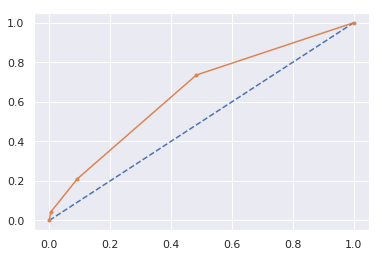

In [255]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AUC: 0.943


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


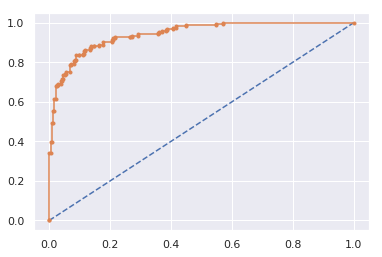

In [258]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = LogisticRegression()
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AUC: 0.682


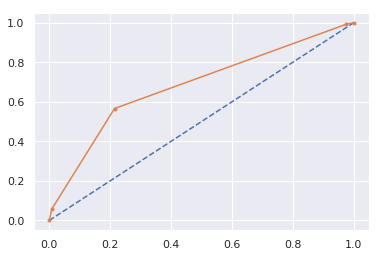

In [260]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = DecisionTreeClassifier(max_depth = 2)
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AUC: 0.687


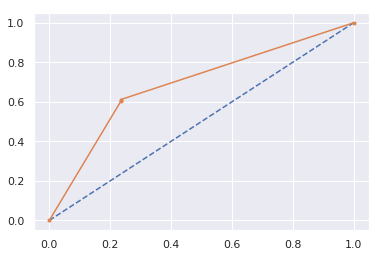

In [261]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = GaussianNB()
training_data1 = training_data.toarray()
model.fit(training_data1, trainy)
# predict probabilities
testing_data1 = testing_data.toarray()
probs = model.predict_proba(testing_data1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AUC: 0.959


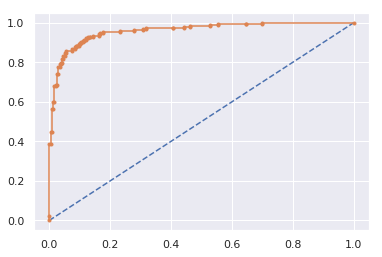

In [262]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = MultinomialNB()
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [263]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = SVC()
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AttributeError: predict_proba is not available when  probability=False